In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/two-variables-data-set-of-hours-and-scores/Students_data.txt


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Correct path to your dataset
placement = "/kaggle/input/two-variables-data-set-of-hours-and-scores/Students_data.txt"

In [4]:
# Load the dataset
df = pd.read_csv(placement)

In [5]:
# Display the first few rows and info of the dataframe
print(df.head())
print(df.info())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


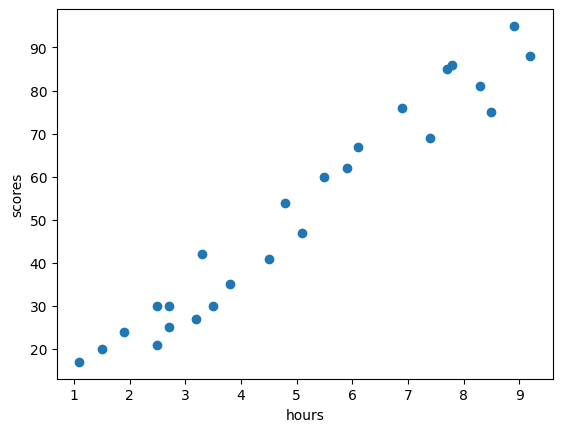

In [6]:
# Scatter plot of Hours vs Scores
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [7]:
# Preparing the data
X = df[['Hours']]
Y = df['Scores']


In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
# Training the Linear Regression model on the Training set
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# Predicting the Test set results
Y_pred = lr.predict(X_test)
print(f"Predicted score for {X_test.iloc[0].values} hours of study: {Y_pred[0]}")


Predicted score for [1.5] hours of study: 16.884144762398023


In [11]:
# Calculating Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 4.183859899002982


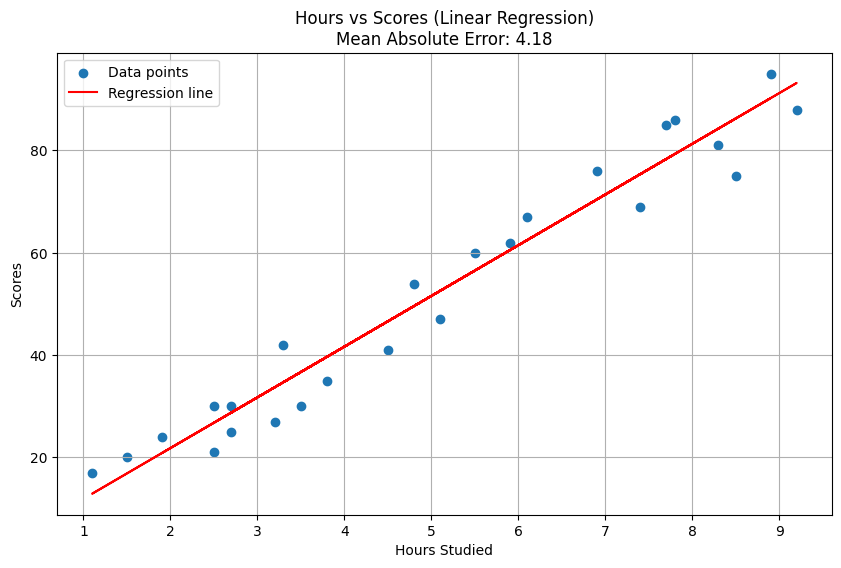

In [12]:
# Visualizing the Training set results with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'], label='Data points')
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression line')
plt.title('Hours vs Scores (Linear Regression)\nMean Absolute Error: {:.2f}'.format(mae))
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Function to predict score based on hours of study
def predict_score(hours):
    # Create a DataFrame with the same column name as the training data
    hours_df = pd.DataFrame({'Hours': [hours]})
    predicted_score = lr.predict(hours_df)
    return predicted_score[0]